In [1]:
%matplotlib widget
import sys
import os
import pwd
user = pwd.getpwuid(os.getuid())[0]
sys.path.append(rf"/home/{user}/Flash2OpenPMD/src")
import yt
import numpy as np
from yt import derived_field
from flash2openpmd import Convert

In [2]:
shot = 5

filename = rf'hydro_10PW_2D_{shot}'
run_directory = rf'/media/ong/WORKDIR11/{filename}/'
#filename = "nanowire_array_hdf5_plt_cnt_0828"
#filename = "nanowire_array_hdf5_plt_cnt_0691"
filename2 = "ALUMINIUM_hdf5_plt_cnt_0099"
ts = Convert(run_directory,filename2)

In [3]:
print(ts.read4Flash.__doc__)


        Read the FLASH output

        Parameters
        ----------
        x_min : float
            The minimum boundary in x direction in the unit of centimeter (unit of FLASH code)
        
        y_min : float
            The minimum boundary in y direction in the unit of centimeter (unit of FLASH code)

        z_min : float
            The minimum boundary in y direction in the unit of centimeter (unit of FLASH code)
            z_min=0 for 2D simulation
        
        field : string
        	The field data (unit of FLASH code), i.e. fields="El_number_density"
        
        level : int
            The level of refinement using yt-project. Currently fixed to level=4
        
        Returns
        -------
        A 2d array containing the required density, shape and maximum boundary in each direction.

        


In [4]:
density = ts.get_data(x_min=-2.5e-4,y_min=0,z_min=0,fields="El_number_density", level=6)
n_max = np.max(density)
print("Array dimension for density, [y,x] : ", density.shape)
print(f"Maximum density [cm**-3] = {n_max:0.2e}")
# n_e_min/n_e_max

density = density/n_max

# filtering the density
# condition = np.isclose(density, 0.00069, atol=1e-4)

# density[condition] = 0

yt : [INFO     ] 2025-02-25 14:26:02,643 Parameters: current_time              = 4.9501259917732036e-11
yt : [INFO     ] 2025-02-25 14:26:02,645 Parameters: domain_dimensions         = [16 16  1]
yt : [INFO     ] 2025-02-25 14:26:02,646 Parameters: domain_left_edge          = [-0.00025  0.       0.     ]
yt : [INFO     ] 2025-02-25 14:26:02,647 Parameters: domain_right_edge         = [2.5e-04 5.0e-04 1.0e+00]
yt : [INFO     ] 2025-02-25 14:26:02,648 Parameters: cosmological_simulation   = 0


Array dimension for density, [y,x] :  (1024, 1024)
Maximum density [cm**-3] = 3.93e+22


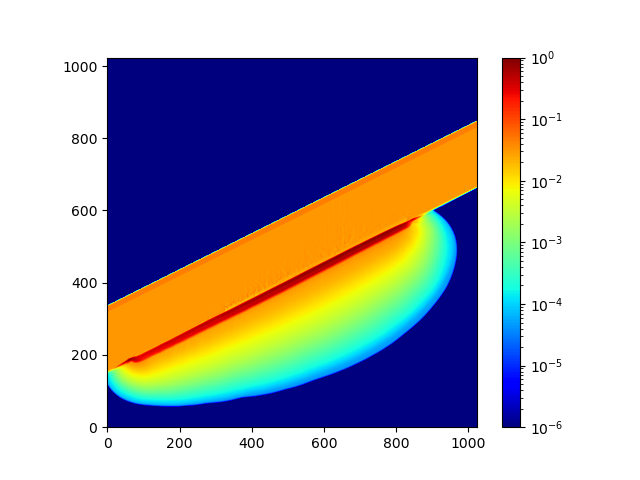

In [5]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

fig, ax = plt.subplots()

img_P = ax.imshow(
        density[:,:],
        origin='lower',
        norm=LogNorm(vmin=1e-6),
        cmap='jet',
        aspect='equal'
    )
cbar_fields = plt.colorbar(
        img_P, 
        orientation="vertical",
        ticklocation="right",
    )

In [6]:
ts.write2openpmd(density,species='e',output_name=f"hydro_10PW_{shot}")